In [150]:
import os

In [151]:
#Inisialisasi neural network, bobot n bias

from random import seed
from random import random
 
def init_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
seed(1)
network = init_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


In [152]:
#directory

base_dir = './flowers'
sunflower_dir = './flowers/sunflower'
daisy_dir = './flowers/daisy'
dandelion_dir = './flowers/dandelion'

In [153]:
#Visualisasi data
import cv2
import matplotlib.pyplot as plt
import numpy as np

def vizualization(flowers_name,DIR):
    plt.suptitle(flowers_name)
    dir_name=os.listdir(DIR)
    for j in range(0,4):
        img = dir_name[j]
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        
vizualization('sunflower',sunflower_dir)
vizualization('daisy',daisy_dir)
vizualization('dandelion',dandelion_dir)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-dn5w5exm\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 432x288 with 0 Axes>

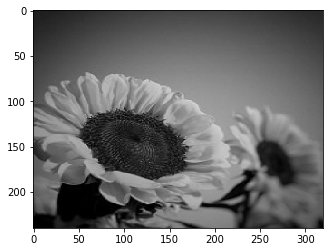

[31 31 31 ...  0  0  0]


In [154]:
#convert ke gray image
def grayImage(image):
    img = cv2.imread(image)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

    width = int(320)
    height = int(240)
    dim = (width, height)

    resized = cv2.resize(img_rgb, dim, interpolation = cv2.INTER_AREA)

    return resized

plt.imshow(grayImage('./flowers/sunflower/sunflo (1).jpg'))
plt.show()

print((grayImage('./flowers/sunflower/sunflo (1).jpg')).flatten())

In [155]:
# ambil dataset sunflower
x_sunflower = [] #feature
for filename in os.listdir(sunflower_dir):
    f = os.path.join(sunflower_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        x_sunflower.append((grayImage(f)).flatten())

x_sunflower = np.array(x_sunflower) #output
y_sunflower = [[1, 0, 0] for i in range(len(x_sunflower))]

In [156]:
# ambil dataset dandelion
x_dandelion = []
for filename in os.listdir(dandelion_dir):
    f = os.path.join(dandelion_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        x_dandelion.append((grayImage(f)).flatten())

x_dandelion = np.array(x_dandelion)
y_dandelion = [[0, 1, 0] for i in range(len(x_dandelion))]

In [157]:
# ambil dataset daisy
x_daisy = []
for filename in os.listdir(daisy_dir):
    f = os.path.join(daisy_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        x_daisy.append((grayImage(f)).flatten())

x_daisy = np.array(x_daisy)
y_daisy = [[0, 0, 1] for i in range(len(x_daisy))]

In [158]:
#fungsi sigmoid
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

print(sigmoid(32))

0.9999999999999873


In [159]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [160]:
def transfer_derivative(output):
	return output * (1.0 - output)
 
# menghitung error backpropagation
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test error backpropagation
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0004931412394950468}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.0006117870374624608}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.004987375477930005}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [161]:
# backporopagation - Feedforward
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = sigmoid(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [162]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

# Update bobot
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0004931412394950468}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.0006117870374624608}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.004987375477930005}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [163]:
from sklearn.utils import shuffle

# penggabungan dataset dari 3 kelas
x = np.concatenate((x_sunflower, x_dandelion, x_daisy), axis=0)
y = np.concatenate((y_sunflower, y_dandelion, y_daisy), axis=0)

In [164]:
# train test split
# acak array karena array sebelumnya kelasnya berurutan
x, y = shuffle(x, y, random_state=0)

def train_test_split(dataset, split=0.80):
    train = list()
    train_size = split * len(dataset)
    test = list(dataset)
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop())
    return np.array(train), np.array(test)

x_train, x_test = train_test_split(x)
y_train, y_test = train_test_split(y)

In [165]:
# fungsi training
def train_network(network, x_train, y_train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for index,row in enumerate(x_train):
      outputs = forward_propagate(network, row)
      expected = y_train[index]
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return network

    
# test train
seed(1)
# banyak input dan output
n_inputs = len(x[0]) - 1
n_outputs = 3

# inisialisasi network
network = init_network(n_inputs, 2, n_outputs)
# network hasil training
trained_network = train_network(network, x_train, y_train, 0.5, 20, n_outputs)

In [166]:
# max function
def find_max(arr):
  index = np.argmax(arr)
  if index == 0:
    arr[0] = 1
    arr[1] = 0
    arr[2] = 0
  elif index == 1:
    arr[0] = 0
    arr[1] = 1
    arr[2] = 0
  else :
    arr[0] = 0
    arr[1] = 0
    arr[2] = 1
  return arr

In [174]:
# Prediksi
predicted = []
def predict(network, row):
    outputs = forward_propagate(network, row)
    outputs = find_max(outputs)
    #penamaan kelas     
    if(outputs == [1, 0, 0]):
        name = "Sunflower"
    elif (outputs == [0, 1, 0]):
        name = "Dandelion"
    elif (outputs == [0, 0, 1]):
        name = "Daisy"
    else :
        name = "undefined"
    return outputs, name

for row in x_test:
    prediction, name = predict(trained_network, row)
    predicted.append(prediction)

In [175]:
# mencari nilai akurasi
def nilai_akurasi(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i] == predicted[i]).all():
            correct += 1
    return correct / float(len(actual)) * 100.0

akurasi = nilai_akurasi(y_test, predicted)
akurasi

33.33333333333333